Script to make input picture look in huge pixels. Averaging pixels by net of 50x100.

In [19]:
from io import BytesIO
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image
from cairosvg import svg2png

In [20]:
def load_diamonds(style='gray'):
    '''Load diamonds image in grayscale and resize each diamond.'''

    img_diamonds = cv2.imread('diamonds/gray/diamonds.png')
    # turn img to grayscale
    img_diamonds = cv2.cvtColor(img_diamonds, cv2.COLOR_BGR2GRAY)

    # cut diamonds height x height
    height, width = img_diamonds.shape[:2]

    img_diamond_1 = img_diamonds[:height, :height]
    img_diamond_2 = img_diamonds[:height, height+155:height*2+155]
    img_diamond_3 = img_diamonds[:height, height*2+155+157:height*3+155+157]
    img_diamond_4 = img_diamonds[:height, height*3+155+157+161:height*4+155+157+161]
    img_diamond_5 = img_diamonds[:height, height*4+155+157+161+157:height*5+155+157+161+157]
    
    diamonds = []
    for im in [img_diamond_5, img_diamond_4, img_diamond_3, img_diamond_2, img_diamond_1]:
        # resize diamonds
        im = cv2.resize(im, (33, 33))
        diamonds.append(im)
    
    for n, i in enumerate(diamonds):
        cv2.imwrite(f'brick {n}.png', i)

In [21]:
load_diamonds()

In [13]:
path = './diamonds/'

# def load_diamonds(style='gray'):
#     '''Load diamonds image in grayscale and resize each diamond.'''

#     img_diamonds = cv2.imread(path)
#     # turn img to grayscale
#     img_diamonds = cv2.cvtColor(img_diamonds, cv2.COLOR_BGR2GRAY)

#     # cut diamonds height x height
#     height, width = img_diamonds.shape[:2]

#     img_diamond_1 = img_diamonds[:height, :height]
#     img_diamond_2 = img_diamonds[:height, height+155:height*2+155]
#     img_diamond_3 = img_diamonds[:height, height*2+155+157:height*3+155+157]
#     img_diamond_4 = img_diamonds[:height, height*3+155+157+161:height*4+155+157+161]
#     img_diamond_5 = img_diamonds[:height, height*4+155+157+161+157:height*5+155+157+161+157]
    
#     diamonds = []
#     for im in [img_diamond_5, img_diamond_4, img_diamond_3, img_diamond_2, img_diamond_1]:
#         # resize diamonds
#         im = cv2.resize(im, (33, 33))
#         diamonds.append(im)

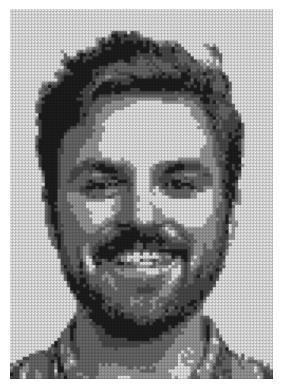

In [ ]:
brightness = 1.25
clipLim = 2
thresholds = [0, 56, 102, 180, 226]
dim = (83, 117)

img = cv2.convertScaleAbs(img, alpha=brightness)
clahe = cv2.createCLAHE(clipLimit=clipLim, tileGridSize=(8,8))
img = clahe.apply(img)
img = cv2.GaussianBlur(img, (9,9), 0)

img = cv2.resize(img, dim)

lut = []
counter = 256
for i in thresholds[::-1]:
    lut.extend([i] * (counter - i))
    counter = i
lut = lut[::-1]

img = Image.fromarray(img).point(lut)
img = np.array(img)

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        # get closest neighbors of 3x3 matrix (in case of edges it will be less)
        neighbors = img[i-1:i+2, j-1:j+2]
        # check if all neighbors excluding centeral pixel are the same
        if neighbors[0][0] == neighbors[0][1] == neighbors[0][2] == neighbors[1][0] == neighbors[1][2] == neighbors[2][0] == neighbors[2][1] == neighbors[2][2] and neighbors[1][1] != neighbors[0][0]:
            img[i][j] = neighbors[0][0]

diamonds_map = {}
for t, d in zip(thresholds, diamonds):
    diamonds_map.update({t: d})

diam_size = diamonds[0].shape[0]
img_diamonds = np.zeros((img.shape[0]*diam_size, img.shape[1]*diam_size), dtype=np.uint8)

# turn pixels to diamonds
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_diamonds[i*diam_size:(i+1)*diam_size, j*diam_size:(j+1)*diam_size] = diamonds_map[img[i][j]]

show_pic(img_diamonds)

In [14]:
def load_diamonds(style):
    diamonds_style = {
        'gray': [
            'diamonds/gray/brick 0.png',
            'diamonds/gray/brick 1.png',
            'diamonds/gray/brick 2.png',
            'diamonds/gray/brick 3.png',
            'diamonds/gray/brick 4.png'
        ],
        'popart': [
            'diamonds/popart/brick X.svg',
            'diamonds/popart/brick A.svg',
            'diamonds/popart/brick T.svg',
            'diamonds/popart/brick E.svg',
            'diamonds/popart/brick M.svg',
            'diamonds/popart/brick L.svg',
            'diamonds/popart/brick O.svg'
        ],
        'sapfir': [
            'diamonds/sapfir/brick Y.svg',
            'diamonds/sapfir/brick U.svg',
            'diamonds/sapfir/brick G.svg',
            'diamonds/sapfir/brick R.svg',
            'diamonds/sapfir/brick I.svg',
            'diamonds/sapfir/brick H.svg',
            'diamonds/sapfir/brick O.svg'
        ],
        'sepia': [
            'diamonds/sepia/brick X.svg',
            'diamonds/sepia/brick S.svg',
            'diamonds/sepia/brick F.svg',
            'diamonds/sepia/brick W.svg',
            'diamonds/sepia/brick K.svg',
            'diamonds/sepia/brick P.svg',
            'diamonds/sepia/brick O.svg'
        ]
    }

    if style == 'gray':
        diamonds = [cv2.imread(path) for path in diamonds_style[style]]
        diamonds = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2GRAY), diamonds))
    else:
        diamonds = []
        for path in diamonds_style[style]:
            with open(path) as f:
                img = svg2png(file_obj=f)
            pil_img = Image.open(BytesIO(img)).convert('RGB')
            cv_img = np.array(pil_img)
            diamonds.append(cv_img)
    
    return diamonds

In [18]:
d = load_diamonds('popart')
d[0].shape

(33, 33, 3)

In [13]:
path = Path('./diamonds/')
path = path.joinpath('gray')
for f in path.glob('./brick*.*'):
    print(f)
# with open('diamonds/popart/brick A.svg') as f:
#     img = svg2png(file_obj=f)
# pil_img = Image.open(BytesIO(img)).convert('RGBA')
# cv_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_)
# cv_img.shape

diamonds/gray/brick 1.png
diamonds/gray/brick 4.png
diamonds/gray/brick 3.png
diamonds/gray/brick 5.png
diamonds/gray/brick 2.png


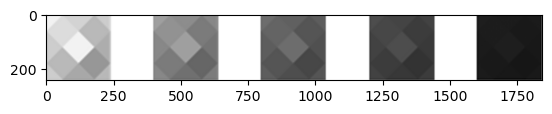

In [2]:
# import diamonds image
img_diamonds = cv2.imread('./diamonds.png')
# turn to bw
img_diamonds = cv2.cvtColor(img_diamonds, cv2.COLOR_BGR2GRAY)
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img_diamonds, cv2.COLOR_BGR2RGB))

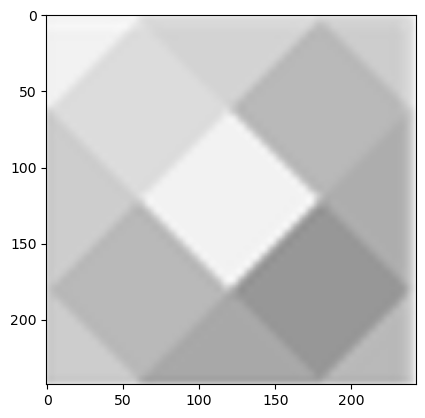

In [3]:
height, width = img_diamonds.shape[:2]
# cut top left diamond height x height
img_diamond_1 = img_diamonds[:height, :height]
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img_diamond_1, cv2.COLOR_BGR2RGB))

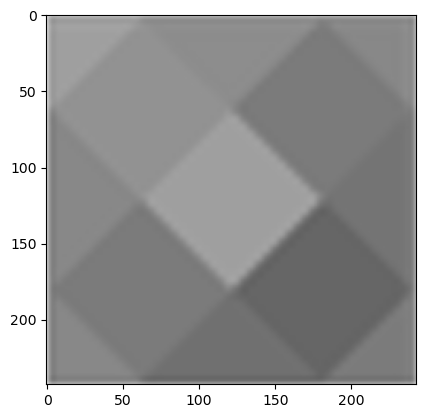

In [4]:
# cut next diamond height x height
img_diamond_2 = img_diamonds[:height, height+155:height*2+155]
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img_diamond_2, cv2.COLOR_BGR2RGB))

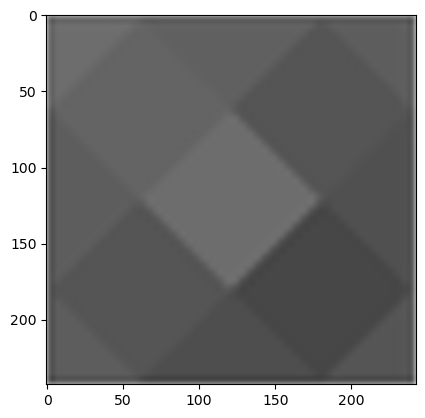

In [5]:
# cut next diamond height x height
img_diamond_3 = img_diamonds[:height, height*2+155+157:height*3+155+157]
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img_diamond_3, cv2.COLOR_BGR2RGB))

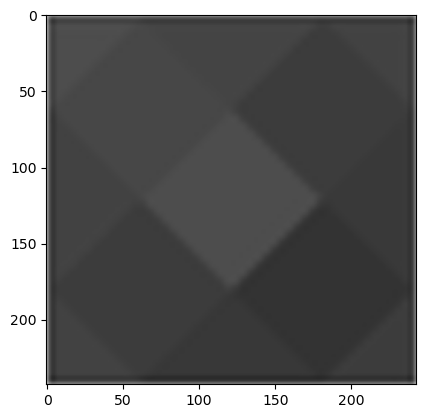

In [6]:
# cut next diamond height x height
img_diamond_4 = img_diamonds[:height, height*3+155+157+161:height*4+155+157+161]
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img_diamond_4, cv2.COLOR_BGR2RGB))

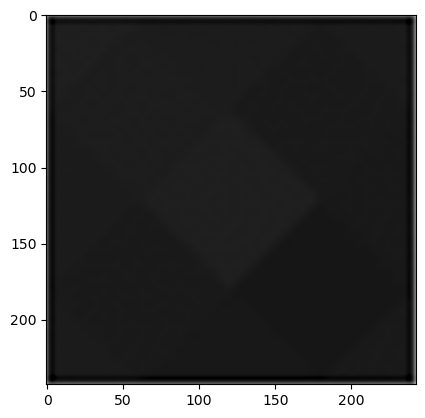

In [7]:
# cut next diamond height x height
img_diamond_5 = img_diamonds[:height, height*4+155+157+161+157:height*5+155+157+161+157]
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img_diamond_5, cv2.COLOR_BGR2RGB))

In [8]:
# print shape of each diamond
diamonds = []
for im in [img_diamond_1, img_diamond_2, img_diamond_3, img_diamond_4, img_diamond_5]:
    # resize image to 32 x 32
    im = cv2.resize(im, (32, 32))
    diamonds.append(im)

diamonds = diamonds[::-1]

(2666, 4000)

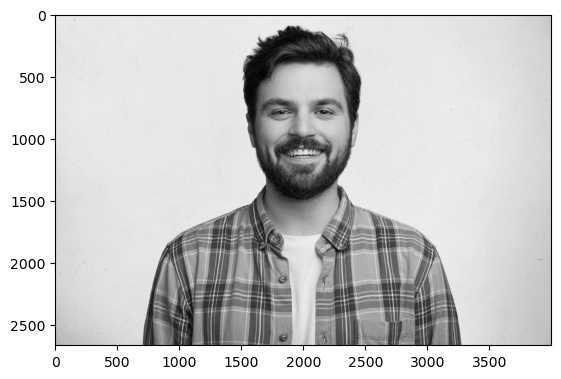

In [9]:
# open image
img = cv2.imread('img.jpg')
# print image in matplotlib but first convert to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print image in matplotlib
plt.imshow(img, cmap='gray')
img.shape

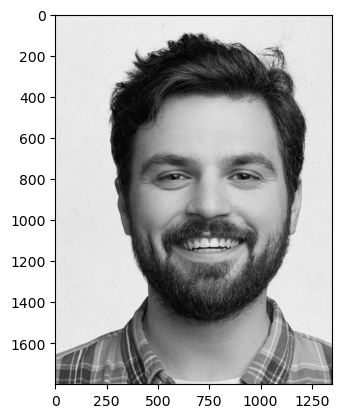

In [10]:
# cut only square from image keeping the center
# height, width = img.shape[:2]
# if height > width:
#     img = img[int((height - width) / 2):int((height + width) / 2), :]
# else:
#     img = img[:, int((width - height) / 2):int((width + height) / 2)]
# # print image in matplotlib
# plt.imshow(img, cmap='gray')

img_crop = img[0:1800, 1250:2600]
plt.imshow(img_crop, cmap='gray')
img = img_crop


In [11]:
# # create zero img of 150x150 in bw
# img = np.zeros((150, 150), dtype=np.uint8)
# # print image in matplotlib
# plt.imshow(img, cmap='gray')

In [12]:
# img_low_cut = img_low
# # keep only middle top 100x100 pixels of image img_low
# img_low_cut = img_low[0:140, 30:170]
# # print image in matplotlib
# plt.imshow(img_low_cut, cmap='gray')

In [13]:
# minimal size of height or width
# min_size = 150

# point of color (gray) intervals and corresponded diamonds
# codes = [0, 56, 102, 143, 226]

(200, 150)

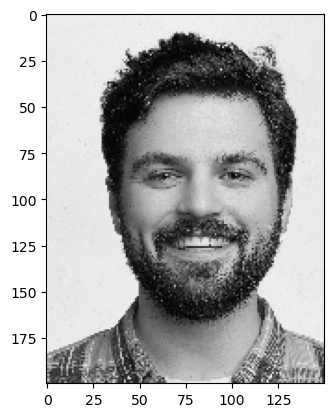

In [14]:
# resize image
dim = (min_size, int((np.max(img.shape) / np.min(img.shape)) * min_size))
if np.argmax(img.shape) == 1:
    dim = dim[::-1]

img_low = cv2.resize(img, dim)
# print image in matplotlib
plt.imshow(img_low, cmap='gray')
img_low_cut = img_low
img_low_cut.shape

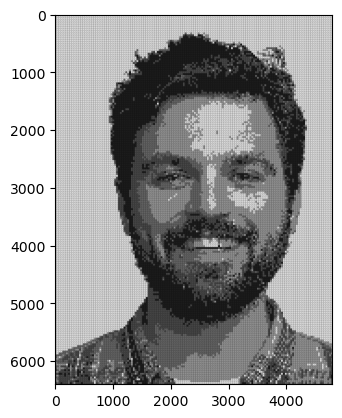

In [15]:
diamonds_map = {}
for t, d in zip(codes, diamonds):
    diamonds_map.update({t: d})

# make lut for Image.point
lut = []
n, m = 256 // len(codes), 256 % len(codes)
lut.extend([codes[0]] * m)
for i in codes:
    lut.extend([i] * n)

img_pix = img_low_cut.copy()
img_pil = Image.fromarray(img_pix).point(lut)
img_pix = np.array(img_pil)

# print image in matplotlib
# plt.imshow(img_pix, cmap='gray')

# fill img_diamonds with diamonds according to img_pix and diamonds_map
diam_size = im.shape[0]
img_diamonds = np.zeros((img_low_cut.shape[0]*diam_size, img_low_cut.shape[1]*diam_size), dtype=np.uint8)

# def pix_to_diamonds(pix):
#     return diamonds_map[pix]
# pix_to_diamondsV = np.vectorize(pix_to_diamonds)
# img_pix = pix_to_diamondsV(im)

# check if all closest neighbors of a pixel have same color and different from it's own then change it to the same
for i in range(1, img_pix.shape[0]-1):
    for j in range(1, img_pix.shape[1]-1):
        # get closest neighbors of 3x3 matrix (in case of edges it will be less)
        neighbors = img_pix[i-1:i+2, j-1:j+2]
        # print(i, j, neighbors)
        # check if all neighbors excluding centeral pixel are the same
        if neighbors[0][0] == neighbors[0][1] == neighbors[0][2] == neighbors[1][0] == neighbors[1][2] == neighbors[2][0] == neighbors[2][1] == neighbors[2][2] and neighbors[1][1] != neighbors[0][0]:
            img_pix[i][j] = neighbors[0][0]


for i in range(img_pix.shape[0]):
    for j in range(img_pix.shape[1]):
        img_diamonds[i*diam_size:(i+1)*diam_size, j*diam_size:(j+1)*diam_size] = diamonds_map[img_pix[i][j]]

# print image in matplotlib
img_diamonds = cv2.cvtColor(img_diamonds, cv2.COLOR_BGR2RGB)
plt.imshow(img_diamonds, cmap='gray')
# save image to file diamonds.jpg
# cv2.imwrite('diamonds.jpg', img_diamonds)


In [2]:
path_to_img = 'img.jpg'
path_to_diamonds = 'diamonds.png'
min_size = 150
thresholds = [0, 56, 102, 143, 226]

In [5]:
def load_img(path: str):
    '''Load image as numpy array in grayscale.'''

    # open image
    img = cv2.imread(path)
    # convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img


def load_diamonds(path: str, size: tuple = (32, 32)):
    '''Load diamonds image in grayscale and resize each diamond.'''

    img_diamonds = cv2.imread(path)
    # turn img to grayscale
    img_diamonds = cv2.cvtColor(img_diamonds, cv2.COLOR_BGR2GRAY)

    # cut diamonds height x height
    height, width = img_diamonds.shape[:2]

    img_diamond_1 = img_diamonds[:height, :height]
    img_diamond_2 = img_diamonds[:height, height+155:height*2+155]
    img_diamond_3 = img_diamonds[:height, height*2+155+157:height*3+155+157]
    img_diamond_4 = img_diamonds[:height, height*3+155+157+161:height*4+155+157+161]
    img_diamond_5 = img_diamonds[:height, height*4+155+157+161+157:height*5+155+157+161+157]

    diamonds = []
    for im in [img_diamond_5, img_diamond_4, img_diamond_3, img_diamond_2, img_diamond_1]:
        # resize diamonds
        im = cv2.resize(im, size)
        diamonds.append(im)

    return diamonds


def img_to_diamonds(img, min_size, thresholds, diamonds):
    
    dim = (min_size, int((np.max(img.shape) / np.min(img.shape)) * min_size))
    if np.argmax(img.shape) == 1:
        dim = dim[::-1]

    img = cv2.resize(img, dim)

    diamonds_map = {}
    for t, d in zip(thresholds, diamonds):
        diamonds_map.update({t: d})

    # make lut for Image.point
    lut = []
    n, m = 256 // len(thresholds), 256 % len(thresholds)
    lut.extend([thresholds[0]] * m)
    for i in thresholds:
        lut.extend([i] * n)

    img_pix = img.copy()
    img_pil = Image.fromarray(img_pix).point(lut)
    img_pix = np.array(img_pil)

    # fill img_diamonds with diamonds according to img_pix and diamonds_map
    diam_size = im.shape[0]
    img_diamonds = np.zeros((img.shape[0]*diam_size, img.shape[1]*diam_size), dtype=np.uint8)

    # check if all closest neighbors of a pixel have same color and different from it's own then change it to the same
    for i in range(1, img_pix.shape[0]-1):
        for j in range(1, img_pix.shape[1]-1):
            # get closest neighbors of 3x3 matrix (in case of edges it will be less)
            neighbors = img_pix[i-1:i+2, j-1:j+2]
            # print(i, j, neighbors)
            # check if all neighbors excluding centeral pixel are the same
            if neighbors[0][0] == neighbors[0][1] == neighbors[0][2] == neighbors[1][0] == neighbors[1][2] == neighbors[2][0] == neighbors[2][1] == neighbors[2][2] and neighbors[1][1] != neighbors[0][0]:
                img_pix[i][j] = neighbors[0][0]

    for i in range(img_pix.shape[0]):
        for j in range(img_pix.shape[1]):
            img_diamonds[i*diam_size:(i+1)*diam_size, j*diam_size:(j+1)*diam_size] = diamonds_map[img_pix[i][j]]

    return img_diamonds


def show_pic(img):
    plt.imshow(img, cmap='gray')


def save_pic(img, path):
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
diamonds = load_diamonds(path_to_diamonds)
img = load_img(path_to_img)

diamonded_img = img_to_diamonds(
    img,
    min_size=150,
    thresholds=thresholds,
    diamonds=diamonds
)

NameError: name 'img_low_cut' is not defined

In [ ]:
show_pic(img)

In [ ]:
show_pic(diamonded_img)
save_pic(diamonded_img, 'example.jpg')

True

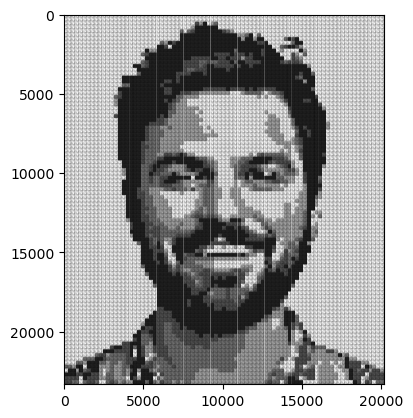

In [22]:
# color_map = {
#     1: [0, 51+5],
#     2: [51+5, 51*2],
#     3: [51*2, 51*3-10],
#     4: [51*3-10, 51*4+10],
#     5: [51*4+10, 256]
# }
# diamonds_map = {
#     1: img_diamond_5,
#     2: img_diamond_4,
#     3: img_diamond_3,
#     4: img_diamond_2,
#     5: img_diamond_1
# }
# diam_size = img_diamond_1.shape[0]
# # map each pixel to get value according to the dictionary color_map
# img_pix = img_low_cut.copy()
# for i in range(img_low_cut.shape[0]):
#     for j in range(img_low_cut.shape[1]):
#         for key, value in color_map.items():
#             if img_low_cut[i][j] >= value[0] and img_low_cut[i][j] < value[1]:
#                 img_pix[i][j] = key
#                 break

# check if all closest neighbors of a pixel have same color and different from it's own then change it to the same
for i in range(1, img_pix.shape[0]-1):
    for j in range(1, img_pix.shape[1]-1):
        # get closest neighbors of 3x3 matrix (in case of edges it will be less)
        neighbors = img_pix[i-1:i+2, j-1:j+2]
        # print(i, j, neighbors)
        # check if all neighbors excluding centeral pixel are the same
        if neighbors[0][0] == neighbors[0][1] == neighbors[0][2] == neighbors[1][0] == neighbors[1][2] == neighbors[2][0] == neighbors[2][1] == neighbors[2][2] and neighbors[1][1] != neighbors[0][0]:
            img_pix[i][j] = neighbors[0][0]

# print image in matplotlib
plt.imshow(img_pix, cmap='gray')

# create zero img of img_low_cut.shape[0]*diam_size x img_low_cut.shape[1]*diam_size in bw
img_diamonds = np.zeros((img_low_cut.shape[0]*diam_size, img_low_cut.shape[1]*diam_size), dtype=np.uint8)

# fill img_diamonds with diamonds according to img_pix and diamonds_map
for i in range(img_pix.shape[0]):
    for j in range(img_pix.shape[1]):
        img_diamonds[i*diam_size:(i+1)*diam_size, j*diam_size:(j+1)*diam_size] = diamonds_map[img_pix[i][j]]

# # print image in matplotlib
# plt.imshow(img_diamonds, cmap='gray')
# # save image to file diamonds.jpg
# cv2.imwrite('diamonds.jpg', img_diamonds)

In [15]:
img_pix

array([[5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 3, ..., 5, 3, 3]], dtype=uint8)

True

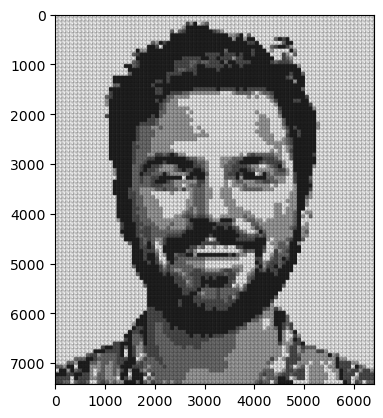

In [15]:
# save in low resolution
img_diamonds_low = cv2.resize(img_diamonds, (1280*5, int(1280*(290/250)*5)))
# print image in matplotlib
plt.imshow(img_diamonds_low, cmap='gray')
# save image to file diamonds_low.jpg
cv2.imwrite('diamonds_low.jpg', img_diamonds_low)


In [39]:
150*290/250

174.0

In [6]:
# split image into blocks on each side split to 100 blocks

blocks = []
for i in range(100):
    for j in range(100):
        block = img[i * 10:(i + 1) * 10, j * 10:(j + 1) * 10]
        blocks.append(block)

img.shape


# # calculate mean of each block
# means = []
# for block in blocks:
#     means.append(np.mean(block))

# # calculate standard deviation of each block
# stds = []
# for block in blocks:
#     stds.append(np.std(block))

# # calculate variance of each block
# variances = []
# for block in blocks:
#     variances.append(np.var(block))

# # draw mean image
# mean_img = np.array(means).reshape(100, 100)
# plt.imshow(mean_img, cmap='gray')


(1162, 1002)

In [18]:
2666/100

26.66